### Team: Valiant Vaccinators
### Using Pandas and Predictive Regression Techniques to Analyze the Correlation between Vaccination and Covid Infections

# Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

# Reading Dataset

In [157]:
covid_national = pd.read_csv(r"./covidnational.csv")
covid_national.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,USA,North America,United States,3/5/2020,184,77,23.857,12,1,1.714,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
1,USA,North America,United States,3/6/2020,237,53,31.429,14,2,2.000,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
2,USA,North America,United States,3/7/2020,403,166,54.000,17,3,2.286,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
3,USA,North America,United States,3/8/2020,519,116,69.571,21,4,2.857,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,4.38
4,USA,North America,United States,3/9/2020,594,75,77.000,22,1,2.286,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN


# Data Cleaning

In [158]:
covid_national = covid_national.drop(["iso_code", "continent", "location", "weekly_icu_admissions", "weekly_icu_admissions_per_million", "weekly_hosp_admissions", "weekly_hosp_admissions_per_million", "tests_units", "excess_mortality", "handwashing_facilities"], axis = 1)
covid_national.head()

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
0,3/5/2020,184,77,23.857,12,1,1.714,0.556,0.233,0.072,...,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,2.77,78.86,0.926
1,3/6/2020,237,53,31.429,14,2,2.000,0.716,0.160,0.095,...,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,2.77,78.86,0.926
2,3/7/2020,403,166,54.000,17,3,2.286,1.218,0.502,0.163,...,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,2.77,78.86,0.926
3,3/8/2020,519,116,69.571,21,4,2.857,1.568,0.350,0.210,...,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,2.77,78.86,0.926
4,3/9/2020,594,75,77.000,22,1,2.286,1.795,0.227,0.233,...,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,2.77,78.86,0.926


In [159]:
covid_national.shape

(486, 50)

# Data Visualization

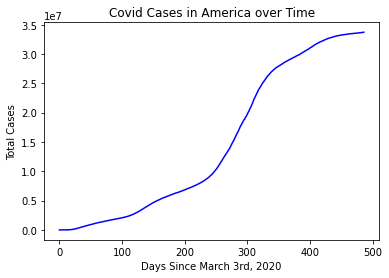

In [86]:
plt.xlabel('Days Since March 3rd, 2020')
plt.ylabel('Total Cases')
plt.rcParams["figure.figsize"] = [10,5]
plt.title('Covid Cases in America over Time')
x_vals = np.linspace(0, 486, 486)
plt.plot(x_vals, covid_national["total_cases"], 'b')

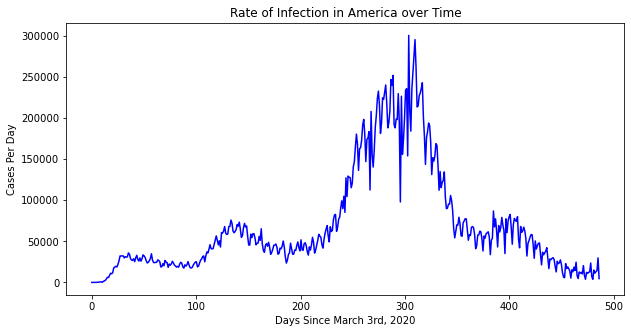

In [88]:
plt.xlabel('Days Since March 3rd, 2020')
plt.ylabel('Cases Per Day')
plt.rcParams["figure.figsize"] = [10,5]
plt.title('Rate of Infection in America over Time')
x_vals = np.linspace(0, 486, 486)
plt.plot(x_vals, covid_national["new_cases"], 'b')

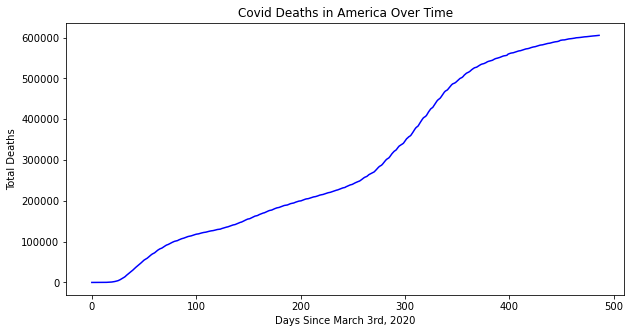

In [89]:
plt.xlabel('Days Since March 3rd, 2020')
plt.ylabel('Total Deaths')
plt.rcParams["figure.figsize"] = [10,5]
plt.title('Covid Deaths in America Over Time')
x_vals = np.linspace(0, 486, 486)
plt.plot(x_vals, covid_national["total_deaths"], 'b')

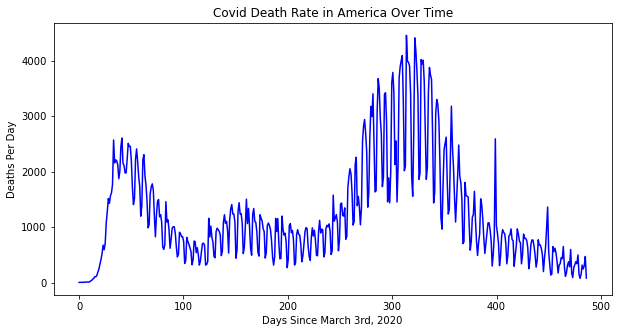

In [90]:
plt.xlabel('Days Since March 3rd, 2020')
plt.ylabel('Deaths Per Day')
plt.rcParams["figure.figsize"] = [10,5]
plt.title('Covid Death Rate in America Over Time')
x_vals = np.linspace(0, 486, 486)
plt.plot(x_vals, covid_national["new_deaths"], 'b')

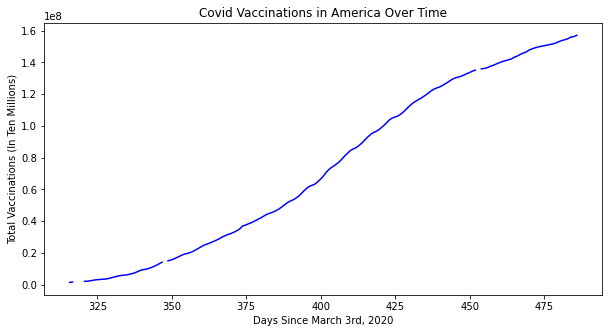

In [93]:
plt.xlabel('Days Since March 3rd, 2020')
plt.ylabel('Total Vaccinations (In Ten Millions)')
plt.rcParams["figure.figsize"] = [10,5]
plt.title('Covid Vaccinations in America Over Time')
x_vals = np.linspace(0, 486, 486)
plt.plot(x_vals, covid_national["people_fully_vaccinated"], 'b')

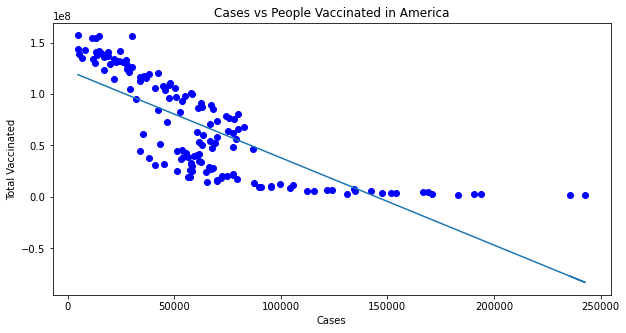

In [100]:
plt.xlabel('Cases')
plt.ylabel('Total Vaccinated')
plt.title('Cases vs People Vaccinated in America')
plt.scatter(covid_national["new_cases"], covid_national["people_fully_vaccinated"], c = "b")
covid_national_temp = covid_national.dropna(inplace=True)
x = np.array(covid_national["new_cases"])
y = np.array(covid_national["people_fully_vaccinated"])
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x + b)

In [180]:
print(covid_national["people_fully_vaccinated"].corr(covid_national["new_cases"]))

-0.7710218434946624


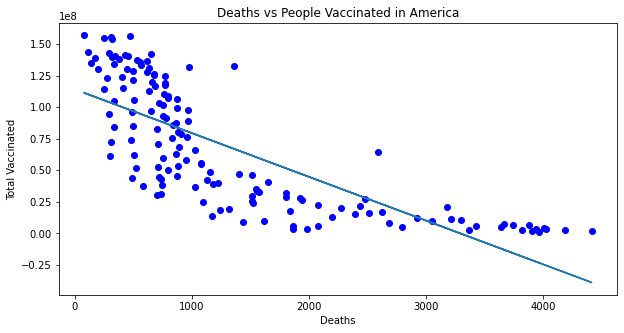

In [177]:
plt.xlabel('Deaths')
plt.ylabel('Total Vaccinated')
plt.rcParams["figure.figsize"] = [10,5]
plt.title('Deaths vs People Vaccinated in America')
plt.scatter(covid_national["new_deaths"], covid_national["people_fully_vaccinated"], c = "b")
covid_national_temp = covid_national.dropna(inplace=True)
x = np.array(covid_national["new_deaths"])
y = np.array(covid_national["people_fully_vaccinated"])
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x + b)

# Predicting Future Covid Cases in America with Linear Regression

In [124]:
X = covid_national.filter(['people_fully_vaccinated', 'positive_rate', 'new_cases'])
y = covid_national['new_deaths']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#scaling the training set
X_train = sc.fit_transform(X_train)
#scaling the test set
X_test = sc.transform(X_test)

In [125]:
X.head()

,people_fully_vaccinated,positive_rate,new_cases
315,1342086.0,0.126,235766
316,1610524.0,0.121,242780
321,2161419.0,0.109,183261
322,2394961.0,0.107,193856
323,2756953.0,0.104,190760


In [126]:
from sklearn import svm
svm_reg = svm.SVR()

regressor = svm_reg.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

from sklearn import metrics 

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 693.8623696510882
Mean Squared Error: 1232939.169278202
Root Mean Squared Error: 1110.3779398376942


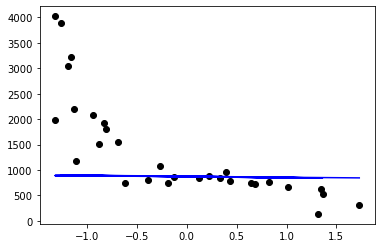

In [134]:
plt.scatter(X_test[:,0], y_test, color = 'black')
plt.plot(X_test[:,0], y_pred, color = 'blue')

In [161]:
covid_national.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
count,1.480000e+02,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,...,1.480000e+02,1.480000e+02,1.480000e+02,1.480000e+02,1.480000e+02,1.480000e+02,1.480000e+02,1.480000e+02,1.480000e+02,1.480000e+02
mean,3.032618e+07,64408.682432,67347.094568,540641.358108,1326.013514,1347.009628,91619.134547,194.586581,203.463872,1633.344486,...,9.732000e+00,5.422545e+04,1.200000e+00,1.510890e+02,1.079000e+01,1.910000e+01,2.460000e+01,2.770000e+00,7.886000e+01,9.260000e-01
std,2.644557e+06,44914.449154,45872.582205,53068.675653,1094.368572,956.964618,7989.534628,135.692093,138.586781,160.327085,...,1.425911e-14,2.117193e-10,1.782389e-15,2.851822e-14,2.138866e-14,5.347166e-14,6.060121e-14,4.010374e-15,8.555465e-14,4.455972e-16
min,2.339383e+07,4739.000000,12376.714000,395937.000000,80.000000,233.714000,70675.667000,14.317000,37.392000,1196.175000,...,9.732000e+00,5.422545e+04,1.200000e+00,1.510890e+02,1.079000e+01,1.910000e+01,2.460000e+01,2.770000e+00,7.886000e+01,9.260000e-01
25%,2.851605e+07,33671.750000,38749.821500,511837.500000,560.250000,665.321250,86150.527750,101.726250,117.068000,1546.324500,...,9.732000e+00,5.422545e+04,1.200000e+00,1.510890e+02,1.079000e+01,1.910000e+01,2.460000e+01,2.770000e+00,7.886000e+01,9.260000e-01
50%,3.069495e+07,58008.500000,60252.857000,555403.500000,874.500000,980.286000,92733.244500,175.250500,182.031500,1677.942500,...,9.732000e+00,5.422545e+04,1.200000e+00,1.510890e+02,1.079000e+01,1.910000e+01,2.460000e+01,2.770000e+00,7.886000e+01,9.260000e-01
75%,3.275758e+07,77356.000000,69610.714500,582497.750000,1813.250000,1971.857250,98964.693250,233.702250,210.302750,1759.797750,...,9.732000e+00,5.422545e+04,1.200000e+00,1.510890e+02,1.079000e+01,1.910000e+01,2.460000e+01,2.770000e+00,7.886000e+01,9.260000e-01
max,3.371406e+07,242780.000000,239619.571000,605493.000000,4416.000000,3420.571000,101854.364000,733.468000,723.920000,1829.269000,...,9.732000e+00,5.422545e+04,1.200000e+00,1.510890e+02,1.079000e+01,1.910000e+01,2.460000e+01,2.770000e+00,7.886000e+01,9.260000e-01


In [162]:
min_threshold, max_threshold = covid_national.new_deaths.quantile([0.1, 0.8])
min_threshold, max_threshold

(326.5, 2079.2)

In [163]:
covid_national_normal = covid_national[covid_national.new_deaths < max_threshold]

In [164]:
covid_national_normal.head()

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
325,1/24/2021,25206050,131198,169949.714,427082,1862,3131.714,76150.599,396.365,513.439,...,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,2.77,78.86,0.926
326,1/25/2021,25357727,151677,171103.857,429062,1980,3192.000,76608.834,458.235,516.926,...,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,2.77,78.86,0.926
332,1/31/2021,26249342,112152,149041.714,449340,1862,3179.714,79302.514,338.825,450.273,...,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,2.77,78.86,0.926
339,2/7/2021,27073661,89746,117759.857,470257,1436,2988.143,81792.884,271.134,355.767,...,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,2.77,78.86,0.926
340,2/8/2021,27164099,90438,111397.429,471877,1620,2922.429,82066.108,273.224,336.545,...,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,2.77,78.86,0.926


In [173]:
X = covid_national_normal.filter(['people_fully_vaccinated', 'positive_rate', 'new_cases'])
y = covid_national_normal['new_deaths']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#scaling the training set
X_train = sc.fit_transform(X_train)
#scaling the test set
X_test = sc.transform(X_test)

In [174]:
from sklearn import svm
svm_reg = svm.SVR()

regressor = svm_reg.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

from sklearn import metrics 

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 353.89812303030163
Mean Squared Error: 206171.6854932144
Root Mean Squared Error: 454.06132349410075


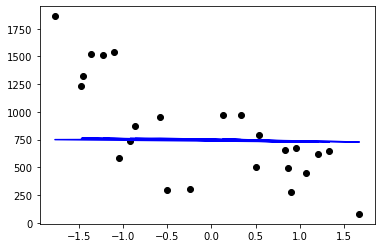

In [175]:
plt.scatter(X_test[:,0], y_test, color = 'black')
plt.plot(X_test[:,0], y_pred, color = 'blue')

In [23]:
covid_data = pd.read_csv(r"./NCCovidDeaths.csv")
covid_data.head()

,Date,Antigen Positive Cases by Specimen Date,Deaths by Date of Death,Cases by Report Date,Molecular (PCR) Positive Cases by Specimen Date
0,3/24/2020,1,1.0,101,175
1,3/25/2020,0,1.0,106,198
2,3/26/2020,0,1.0,132,197
3,3/27/2020,0,1.0,128,167
4,3/28/2020,1,1.0,171,99


In [24]:
covid_data_drop = covid_data.drop(["Date"], axis = 1)
covid_data_drop.head()

,Antigen Positive Cases by Specimen Date,Deaths by Date of Death,Cases by Report Date,Molecular (PCR) Positive Cases by Specimen Date
0,1,1.0,101,175
1,0,1.0,106,198
2,0,1.0,132,197
3,0,1.0,128,167
4,1,1.0,171,99


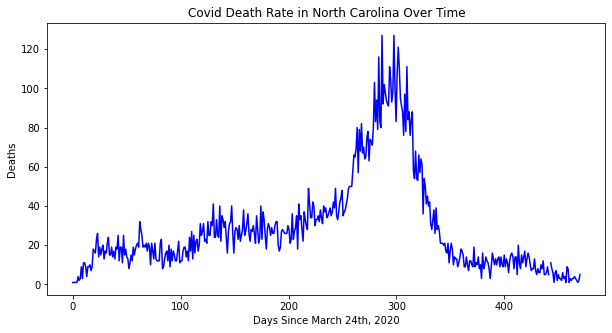

In [31]:
plt.xlabel('Days Since March 24th, 2020')
plt.ylabel('Deaths')
plt.rcParams["figure.figsize"] = [10,5]
plt.title('Covid Death Rate in North Carolina Over Time')
x_vals = np.linspace(0, 470, 470)
plt.plot(x_vals, covid_data["Deaths by Date of Death"], 'b')

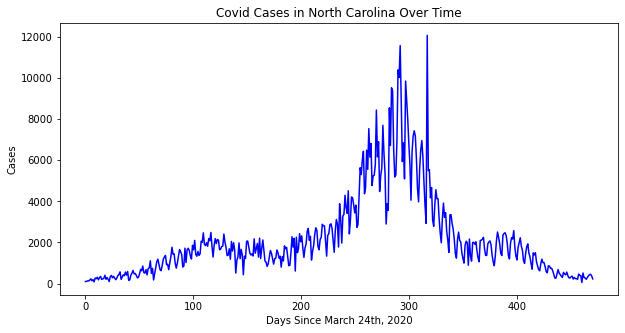

In [46]:
plt.xlabel('Days Since March 24th, 2020')
plt.ylabel('Cases')
plt.rcParams["figure.figsize"] = [10,5]
plt.title('Covid Cases in North Carolina Over Time')
x_vals = np.linspace(0, 470, 470)
plt.plot(x_vals, covid_data["Cases by Report Date"], 'b')

In [12]:
covid_county_deaths = pd.read_csv(r"./NCCountyDeaths.csv")
covid_county_deaths.head()

,County,Date Range,Cases,"Cases Per 10,000 Residents","Cases Per 100,000 Residents",Deaths
0,Mecklenburg,Today,115088,1036,10365,980
1,Brunswick,Today,9402,658,6583,156
2,Caldwell,Today,9534,1160,11602,111
3,Rowan,Today,17327,1219,12195,313
4,Burke,Today,10161,1123,11229,164


In [27]:
covid_county_vac = pd.read_csv(r"./NCCovidVac.csv")
covid_county_vac.head()

,County,Measure Names,Measure Values
0,Yancey,Total Po...,18069
1,Yadkin,Total Po...,37667
2,Wilson,Total Po...,81801
3,Wilkes,Total Po...,68412
4,Wayne,Total Po...,123131


In [31]:
covid_county_vac = covid_county_vac.loc[covid_county_vac["Measure Names"] != "Total                                       Population"]
covid_county_vac = covid_county_vac.loc[covid_county_vac["Measure Names"] != "People Vaccinated with at Least One Doses Federal Pharmacy Programs"]
covid_county_vac = covid_county_vac.loc[covid_county_vac["Measure Names"] != "People Vaccinated with at Least One Doses NC Providers"]
covid_county_vac.shape

(204, 3)

In [34]:
covid_vac = covid_county_vac.loc[covid_county_vac["Measure Names"] != "People Fully Vaccinated                   NC Providers"]
covid_vac_nc = covid_county_vac.loc[covid_county_vac["Measure Names"] != "People Fully Vaccinated                         Federal Pharmacy Programs"]

In [35]:
covid_vac.head()

,County,Measure Names,Measure Values
102,Yancey,People Fully Vaccinated ...,532
103,Yadkin,People Fully Vaccinated ...,2298
104,Wilson,People Fully Vaccinated ...,6308
105,Wilkes,People Fully Vaccinated ...,4946
106,Wayne,People Fully Vaccinated ...,8507


In [36]:
covid_vac_nc.head()

,County,Measure Names,Measure Values
306,Yancey,People Fully Vaccinated NC P...,6409
307,Yadkin,People Fully Vaccinated NC P...,11161
308,Wilson,People Fully Vaccinated NC P...,23943
309,Wilkes,People Fully Vaccinated NC P...,17159
310,Wayne,People Fully Vaccinated NC P...,29561


<BarContainer object of 102 artists>

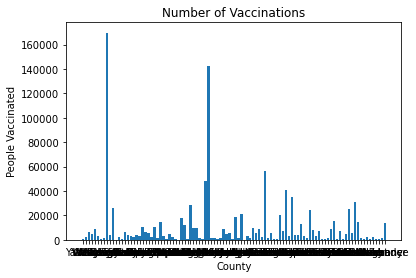

In [38]:
plt.xlabel('County')
plt.ylabel('People Vaccinated')
plt.title('Number of Vaccinations')
plt.bar(covid_vac["County"], covid_vac["Measure Values"])

<BarContainer object of 102 artists>

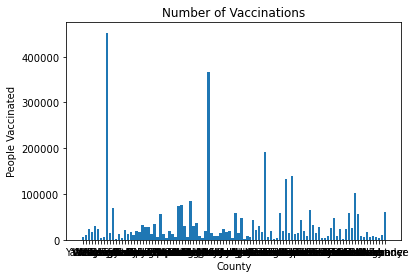

In [41]:
plt.xlabel('County')
plt.ylabel('People Vaccinated')
plt.title('Number of Vaccinations')
plt.bar(covid_vac_nc["County"], covid_vac_nc["Measure Values"])

In [42]:
s1 = covid_vac.set_index('County')['Measure Values']
s2 = covid_vac_nc.set_index('County')['Measure Values']

In [43]:
covid_vac = (s1+s2).reset_index(name = 'Total Vaccinated')

In [44]:
covid_vac.head()

,County,Total Vaccinated
0,Yancey,6941
1,Yadkin,13459
2,Wilson,30251
3,Wilkes,22105
4,Wayne,38068


In [45]:
covid_county_deaths = pd.read_csv(r"./NCCountyDeaths.csv")
covid_county_deaths.head()

,County,Date Range,Cases,"Cases Per 10,000 Residents","Cases Per 100,000 Residents",Deaths
0,Mecklenburg,Today,115088,1036,10365,980
1,Brunswick,Today,9402,658,6583,156
2,Caldwell,Today,9534,1160,11602,111
3,Rowan,Today,17327,1219,12195,313
4,Burke,Today,10161,1123,11229,164


In [46]:
covid_county_deaths = covid_county_deaths.sort_values('County', ascending=False)
covid_county_deaths.head()

,County,Date Range,Cases,"Cases Per 10,000 Residents","Cases Per 100,000 Residents",Deaths
78,Yancey,Today,1638,907,9065,28
94,Yadkin,Today,4142,1100,10996,55
69,Wilson,Today,9974,1219,12193,181
24,Wilkes,Today,6961,1018,10175,117
9,Wayne,Today,11559,939,9388,244


In [47]:
covid_nc = covid_county_deaths.join(covid_vac["Total Vaccinated"])
covid_nc.head()

,County,Date Range,Cases,"Cases Per 10,000 Residents","Cases Per 100,000 Residents",Deaths,Total Vaccinated
78,Yancey,Today,1638,907,9065,28,17300
94,Yadkin,Today,4142,1100,10996,55,7510
69,Wilson,Today,9974,1219,12193,181,17607
24,Wilkes,Today,6961,1018,10175,117,44915
9,Wayne,Today,11559,939,9388,244,18058


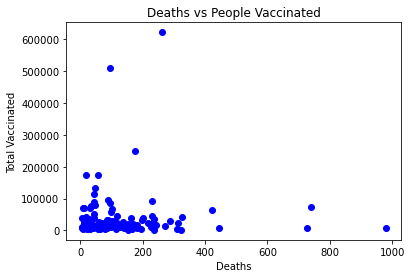

In [49]:
plt.xlabel('Deaths')
plt.ylabel('Total Vaccinated')
plt.title('Deaths vs People Vaccinated')
plt.scatter(covid_nc["Deaths"], covid_nc["Total Vaccinated"], c = "b")

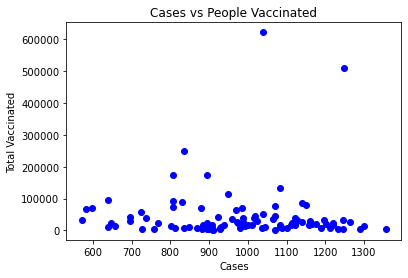

In [51]:
plt.xlabel('Cases')
plt.ylabel('Total Vaccinated')
plt.title('Cases vs People Vaccinated')
plt.scatter(covid_nc["Cases Per 10,000 Residents"], covid_nc["Total Vaccinated"], c = "b")

In [52]:
print(covid_nc["Deaths"].corr(covid_nc["Total Vaccinated"]))

0.00786776928864091
